In [1]:
from google.colab import drive
import tensorflow as tf
from tensorflow import keras
from keras import layers as layers
from keras import activations as af
import matplotlib.pyplot as plt
import tensorboard
import datetime, os
import numpy as np

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
dataAugmentation = keras.Sequential([layers.RandomFlip("horizontal_and_vertical"),
                                     layers.RandomRotation(0.3)])

In [4]:
trainDir = "/content/drive/My Drive/Fall 2022 Studies/CECS 456 Machine Learning/dataset/train"
validateDir = "/content/drive/My Drive/Fall 2022 Studies/CECS 456 Machine Learning/dataset/validate"
testDir = "/content/drive/My Drive/Fall 2022 Studies/CECS 456 Machine Learning/dataset/test"

In [46]:
batchSize = 32
imgHeight = 224
imgWidth = 224

# loads images into 'train' and creates a semi-processed dataset
train = tf.keras.utils.image_dataset_from_directory(trainDir,
                                                 labels="inferred",
                                                 label_mode="categorical",
                                                 color_mode="rgb",
                                                 shuffle=True,
                                                 batch_size=batchSize,
                                                 image_size=(imgHeight, imgWidth))


# standardizing 'train' data set, completes processing of the dataset using the dataAugmentation model
augmentedTrain = train.map(lambda x, y: (dataAugmentation(x, training=True), y))

Found 3000 files belonging to 3 classes.


In [47]:
# loads images into 'validate' and creates a semi-processed dataset
validate = tf.keras.utils.image_dataset_from_directory(validateDir,
                                                    labels="inferred",
                                                    label_mode="categorical",
                                                    color_mode="rgb",
                                                    batch_size=batchSize,
                                                    image_size=(imgHeight, imgWidth))

Found 375 files belonging to 3 classes.


In [48]:
#loads images into 'test'
test = tf.keras.utils.image_dataset_from_directory(testDir,
                                                    labels="inferred",
                                                    label_mode="categorical",
                                                    color_mode="rgb",
                                                    batch_size=batchSize,
                                                    image_size=(imgHeight, imgWidth))

Found 375 files belonging to 3 classes.


In [49]:
# model architecture
numClasses = 3
cnn = tf.keras.models.Sequential(name="VGGNet") #initializing the CNN
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding = "same", input_shape=(224, 224, 3))) #Convolution 1
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding = "same")) #Convolution 2
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)) #Pooling 1

cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding = "same")) #Convolution 3
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding = "same")) #Convolution 4
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)) #Pooling 2

cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding = "same")) #Convolution 5
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding = "same")) #Convolution 6
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding = "same")) #Convolution 7
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)) #Pooling 3

cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation="relu", padding = "same")) #Convolution 8
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation="relu", padding = "same")) #Convolution 9
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation="relu", padding = "same")) #Convolution 10
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)) #Pooling 4

cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation="relu", padding = "same")) #Convolution 11
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation="relu", padding = "same")) #Convolution 12
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation="relu", padding = "same")) #Convolution 13
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)) #Pooling 5

cnn.add(tf.keras.layers.Flatten()) #Flaterning
cnn.add(tf.keras.layers.Dense(units=4096, activation="relu"))#Full Connection1
cnn.add(tf.keras.layers.Dense(units=4096, activation="relu"))#Full Connection2
cnn.add(tf.keras.layers.Dropout(0.5))
cnn.add(tf.keras.layers.Dense(units=3, activation=tf.nn.softmax))#Output layer
# cnn.compile(loss='categorical_crossentropy',
#               optimizer=keras.optimizers.Adam(),
#               metrics=keras.metrics.Accuracy()
#               )
cnn.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.SGD(learning_rate= 0.001),
              metrics=['categorical_accuracy']
              )
cnn.summary()

Model: "VGGNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_169 (Conv2D)         (None, 224, 224, 64)      1792      
                                                                 
 conv2d_170 (Conv2D)         (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_65 (MaxPoolin  (None, 112, 112, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_171 (Conv2D)         (None, 112, 112, 128)     73856     
                                                                 
 conv2d_172 (Conv2D)         (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_66 (MaxPoolin  (None, 56, 56, 128)      0         
 g2D)                                                       

In [51]:
# train the model
epochs = 60
history = cnn.fit(augmentedTrain,
                    epochs=epochs,
                    validation_data=validate,
                    shuffle=True,
                  )

Epoch 1/60
94/94 [==============================] - 25s 264ms/step - loss: 1.0421 - categorical_accuracy: 0.4593 - val_loss: 0.9900 - val_categorical_accuracy: 0.5840
Epoch 2/60
94/94 [==============================] - 25s 262ms/step - loss: 1.0131 - categorical_accuracy: 0.5027 - val_loss: 1.0412 - val_categorical_accuracy: 0.4080
Epoch 3/60
94/94 [==============================] - 25s 261ms/step - loss: 0.9663 - categorical_accuracy: 0.5517 - val_loss: 0.9131 - val_categorical_accuracy: 0.5947
Epoch 4/60
94/94 [==============================] - 25s 261ms/step - loss: 0.9450 - categorical_accuracy: 0.5640 - val_loss: 0.9711 - val_categorical_accuracy: 0.5440
Epoch 5/60
94/94 [==============================] - 25s 262ms/step - loss: 0.9168 - categorical_accuracy: 0.5953 - val_loss: 0.9595 - val_categorical_accuracy: 0.5627
Epoch 6/60
94/94 [==============================] - 25s 261ms/step - loss: 0.8920 - categorical_accuracy: 0.5947 - val_loss: 0.8930 - val_categorical_accuracy: 0.640

In [56]:
# metrics
metrics = cnn.evaluate(test)

12/12 [==============================] - 1s 32ms/step - loss: 0.6829 - categorical_accuracy: 0.7307


In [55]:
print(history.history.keys())

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


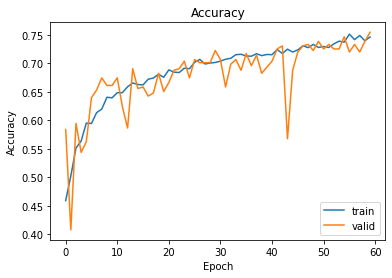

In [57]:
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.title('Accuracy')
plt.legend(["train", "valid"], loc="lower right")
plt.show()

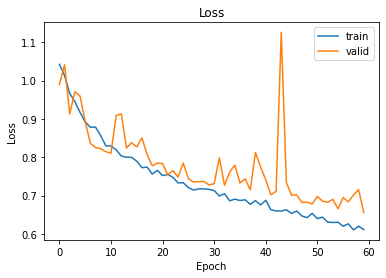

In [58]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.title('Loss')
plt.legend(["train", "valid"], loc="upper right")
plt.show()

Learning Curves